In [39]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras import backend as K
from keras import utils as utls
from keras.datasets import mnist
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense

In [40]:
# Definição de Hiperparâmetros
imageRows, imageCols = 28, 28
batchSize = 256
numClasses = 10
epochs = 3

In [41]:
# Carregando o dataset
(XTrain, yTrain), (XTest, yTest) = mnist.load_data()

In [42]:
XTrain = XTrain.astype('float32')
XTest = XTest.astype('float32')
XTrain = XTrain / 255.0
XTest = XTest / 255.0

In [43]:
yTrain = utls.to_categorical(yTrain, numClasses)
yTest = utls.to_categorical(yTest, numClasses)

In [44]:
if K.image_data_format() == 'channels_first':
  XTrain = XTrain.reshape(XTrain.shape[0], 1, imageRows, imageCols)
  XTest = XTest.reshape(XTest.shape[0], 1, imageRows, imageCols)
  inputShape = (1, imageRows, imageCols)
else:
  XTrain = XTrain.reshape(XTrain.shape[0], imageRows, imageCols, 1)
  XTest = XTest.reshape(XTest.shape[0], imageRows, imageCols, 1)
  inputShape = (imageRows, imageCols, 1)


In [56]:
# Definindo o modelo LeNet
model = Sequential()
model.add(Conv2D(20, (5,5), padding='same', input_shape=inputShape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
model.add(Conv2D(50, (5,5), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
model.add(Flatten())
model.add(Dense(500))
model.add(Activation('relu'))
model.add(Dense(numClasses))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 28, 28, 20)        520       
                                                                 
 activation_30 (Activation)  (None, 28, 28, 20)        0         
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 14, 14, 20)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 14, 14, 50)        25050     
                                                                 
 activation_31 (Activation)  (None, 14, 14, 50)        0         
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 7, 7, 50)         0         
 g2D)                                                 

In [58]:
# Compilação do modelo
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [59]:
minhaLeNetModel = model.fit(XTrain, yTrain, batch_size=batchSize, epochs=epochs, validation_data=(XTest, yTest))

Epoch 1/10
235/235 [==============================] - 42s 177ms/step - loss: 0.2128 - accuracy: 0.9370 - val_loss: 0.0516 - val_accuracy: 0.9842
Epoch 2/10
235/235 [==============================] - 45s 192ms/step - loss: 0.0536 - accuracy: 0.9834 - val_loss: 0.0358 - val_accuracy: 0.9883
Epoch 3/10
235/235 [==============================] - 45s 192ms/step - loss: 0.0359 - accuracy: 0.9887 - val_loss: 0.0369 - val_accuracy: 0.9868
Epoch 4/10
235/235 [==============================] - 45s 194ms/step - loss: 0.0268 - accuracy: 0.9911 - val_loss: 0.0283 - val_accuracy: 0.9893
Epoch 5/10
235/235 [==============================] - 47s 199ms/step - loss: 0.0211 - accuracy: 0.9931 - val_loss: 0.0337 - val_accuracy: 0.9894
Epoch 6/10
235/235 [==============================] - 45s 193ms/step - loss: 0.0166 - accuracy: 0.9945 - val_loss: 0.0284 - val_accuracy: 0.9911
Epoch 7/10
235/235 [==============================] - 49s 207ms/step - loss: 0.0122 - accuracy: 0.9962 - val_loss: 0.0275 - val_ac

Text(0, 0.5, 'Acurácia')

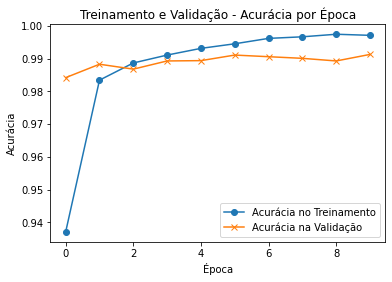

In [63]:
f, ax = plt.subplots()
ax.plot(minhaLeNetModel.history['accuracy'], 'o-')
ax.plot(minhaLeNetModel.history['val_accuracy'], 'x-')
ax.legend(['Acurácia no Treinamento', 'Acurácia na Validação'], loc=0)
ax.set_title('Treinamento e Validação - Acurácia por Época')
ax.set_xlabel('Época')
ax.set_ylabel('Acurácia')

Text(0, 0.5, 'Perda')

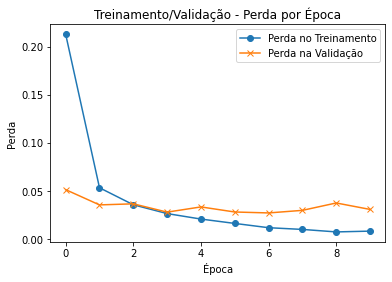

In [64]:
f, ax = plt.subplots()
ax.plot(minhaLeNetModel.history['loss'], 'o-')
ax.plot(minhaLeNetModel.history['val_loss'], 'x-')
ax.legend(['Perda no Treinamento', 'Perda na Validação'], loc=0)
ax.set_title('Treinamento/Validação - Perda por Época')
ax.set_xlabel('Época')
ax.set_ylabel('Perda')